<a href="https://colab.research.google.com/github/kaiquefreire05/pinguins-cluistering/blob/main/pinguins_cluistering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [381]:
# Importações

import pandas as pd # gerenciamento de tabelas
import numpy as np # métodos array multidimensionais
import matplotlib.pyplot as plt # plotar gráfico
import seaborn as sns # plotar gráficos avançados
from sklearn.cluster import KMeans # algoritmo de clusterização
from sklearn.decomposition import PCA # redução de dimensionalidade
from sklearn.preprocessing import StandardScaler # escalonamento de base de dados

In [382]:
# Fazendo a leitura da base de dados e mostrando as 5 primeiras linhas

df = pd.read_csv('/content/drive/MyDrive/datasets/penguins.csv')
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [383]:
# Visualizando as 5 últimas linhas da base de dados

df.tail()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE
343,49.9,16.1,213.0,5400.0,MALE


In [384]:
# Descrição da base de dados

df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [385]:
# Informações da base de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [386]:
# Contagem dos registros da coluna 'sex'

df['sex'].value_counts()

MALE      169
FEMALE    165
.           1
Name: sex, dtype: int64

In [387]:
# Excluindo registro desnecessário

df = df[df['sex'] != '.'] # passando os registros que sejam diferente de '.'
df.reset_index(drop=True, inplace=True) # modificando a dataframe
df['sex'].value_counts() # contando os registros da coluna depois de modificado

MALE      169
FEMALE    165
Name: sex, dtype: int64

In [388]:
# Contagem de valores nulos na base de dados

df.isnull().sum() # fazendo a soma dos valores nulos

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [389]:
# Dropando as linhas nulas

df.dropna(inplace= True) # dropando os valores nulos e fazendo a modificação diretamente na base de dados
df.isnull().sum() # vericando a contagem depois do drop

<ipython-input-389-cd0b6b3be01b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace= True) # dropando os valores nulos e fazendo a modificação diretamente na base de dados


culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

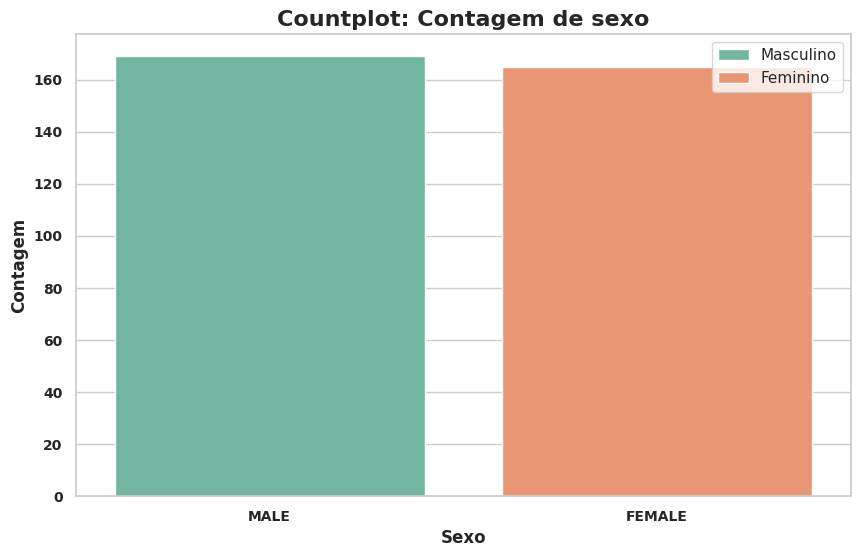

In [390]:
# Countplot: Contagem de sexo

plt.figure(figsize= (10, 6)) # criando figura e definindo seu tamanho
sns.countplot(data= df, x= 'sex', hue= 'sex', palette= 'Set2') # criando o countplot e passando os dados
plt.title('Countplot: Contagem de sexo', fontsize= 16, fontweight= ('bold')) # adicionando o título
plt.xlabel('Sexo', fontweight= 'bold', fontsize= 12) # modificando textos do eixo X
plt.ylabel('Contagem', fontsize= 12, fontweight= 'bold') # modificando textos do eixo Y
plt.xticks(fontsize= 10, fontweight= 'bold') # mudando os ticks do eixo X
plt.yticks(fontsize= 10, fontweight= 'bold') # mudando os ticks do eixo Y
plt.legend(labels = ('Masculino', 'Feminino'), loc= 'upper right') # adicionando legendas
plt.show() # plotando a figura

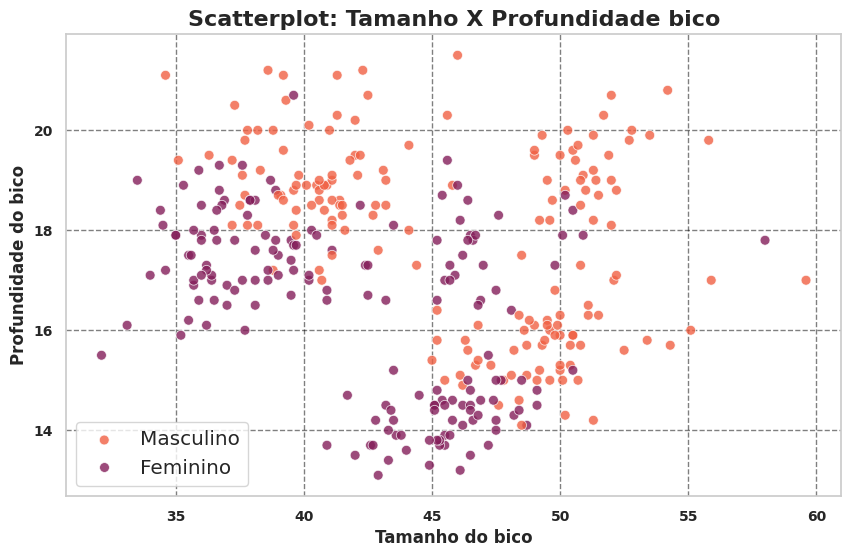

In [391]:
# Scatterplot: Tamanho X Profundidade bico

sex_categories = pd.Categorical(df['sex']) # transformando as variáveis em categoricas para que não ocorra erro nas legendas

plt.figure(figsize=(10, 6)) # criando a figura e definindo tamanho
sns.scatterplot(data=df, x=df['culmen_length_mm'], y=df['culmen_depth_mm'], hue= sex_categories, palette= 'rocket', s= 50, alpha= 0.8) # criando scatter
plt.title('Scatterplot: Tamanho X Profundidade bico', fontsize=16, fontweight='bold') # definindo título
plt.xlabel('Tamanho do bico', fontsize=12, fontweight='bold') # definindo eixo X
plt.ylabel('Profundidade do bico', fontsize=12, fontweight='bold') # definindo eixo Y
plt.xticks(fontsize= 10, fontweight= 'bold') # definindo ticks X
plt.yticks(fontsize= 10, fontweight= 'bold') # definindo ticks Y
plt.legend(labels=('Masculino', 'Feminino'), fontsize='large') # adicionando as legendas
plt.grid(True, linestyle= '--', alpha= 0.5, color= 'black') # habilitando o grid e alterando estilo
plt.show() # plotando a figura

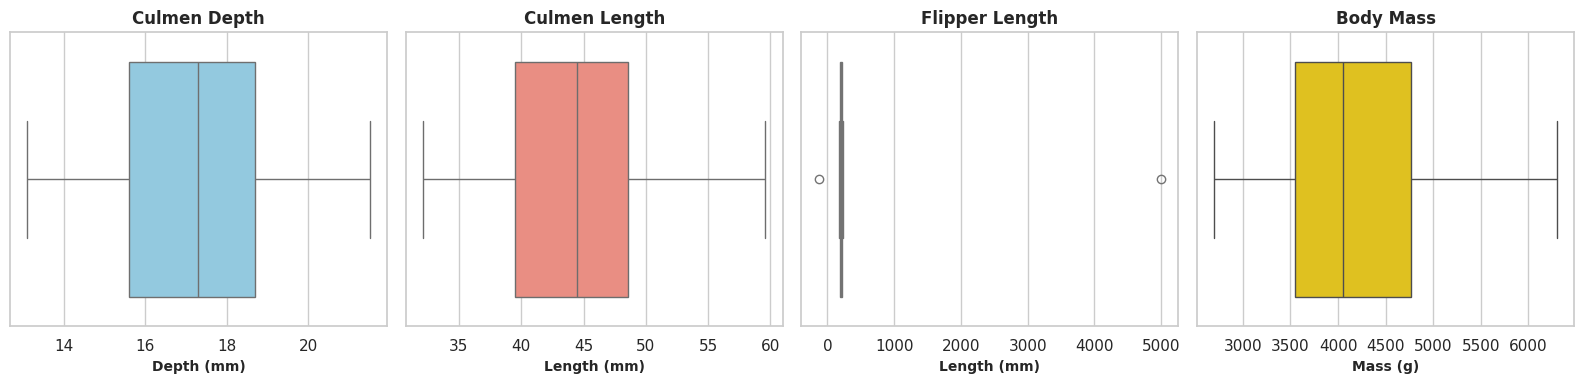

In [392]:
# Boxplot: Verificando distribuição de valores no dataframe

fig, axes = plt.subplots(1, 4, figsize=(16, 4)) #  criando a figura e os eixos para os subplots
sns.set(style="whitegrid") # definindo o estilo dos gráficos como "whitegrid" para adicionar grades
sns.boxplot(data=df, x=df['culmen_depth_mm'], ax=axes[0], color='skyblue') # boxplot para Culmen Depth
axes[0].set_title('Culmen Depth', fontweight= 'bold') # adicionar título ao primeiro subplot
axes[0].set_xlabel('Depth (mm)', fontsize= 10, fontweight= 'bold') # adicionar rótulo ao eixo x
sns.boxplot(data=df, x=df['culmen_length_mm'], ax=axes[1], color='salmon') # boxplot para Culmen Length
axes[1].set_title('Culmen Length', fontweight= 'bold') # adicionar título ao segundo subplot
axes[1].set_xlabel('Length (mm)', fontsize= 10, fontweight= 'bold') # adicionar rótulo ao eixo x
sns.boxplot(data=df, x=df['flipper_length_mm'], ax=axes[2], color='lightgreen') # boxplot para Flipper Length
axes[2].set_title('Flipper Length', fontweight= 'bold') # adicionar título ao terceiro subplot
axes[2].set_xlabel('Length (mm)', fontsize= 10, fontweight= 'bold') # adicionar rótulo ao eixo x
sns.boxplot(data=df, x=df['body_mass_g'], ax=axes[3], color='gold') # boxplot para Body Mass
axes[3].set_title('Body Mass', fontweight= 'bold') # adicionar título ao quarto subplot
axes[3].set_xlabel('Mass (g)', fontsize= 10, fontweight= 'bold') # adicionar rótulo ao eixo x
plt.tight_layout() # ajustar layout para melhorar a visualização
plt.show() # mostrando os gráficos

In [393]:
# Fazendo descrição somente da coluna 'flipper_length_mm', para verificar os outliers

df['flipper_length_mm'].describe()

count     334.000000
mean      214.347305
std       263.648447
min      -132.000000
25%       190.000000
50%       197.000000
75%       213.000000
max      5000.000000
Name: flipper_length_mm, dtype: float64

In [394]:
# Armazendando os outliers e excluindo-os

outliers_fl = df[(df['flipper_length_mm'] < 0) | (df['flipper_length_mm'] > 400)] # buscando outlier e armazendando na variável
df.drop(outliers_fl.index, inplace= True) # dropando diretamente na base de dados

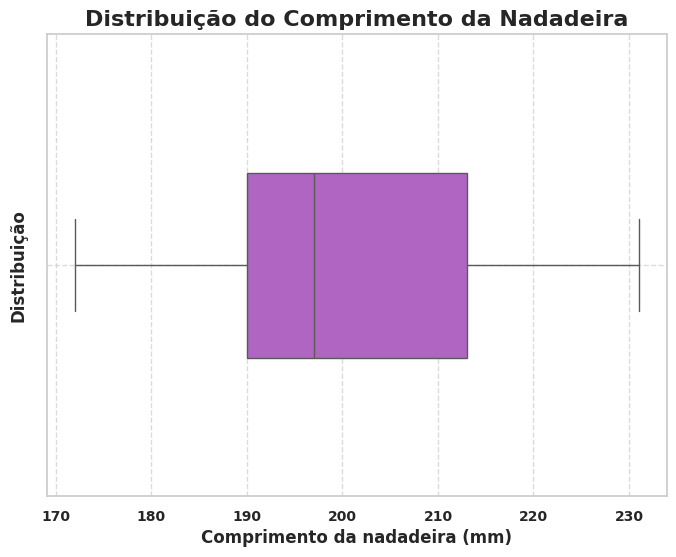

In [395]:
plt.figure(figsize=(8, 6)) # criando e ajustando o tamanho da figura
sns.boxplot(data=df, x= df['flipper_length_mm'], color='mediumorchid', width=0.4) # criando o boxplot e passando os dados
plt.xlabel('Comprimento da nadadeira (mm)', fontsize=12, fontweight= 'bold') # adicionando rótulo ao eixo X
plt.ylabel('Distribuição', fontsize=12, fontweight= 'bold') # adicioando rótulo ao eixo Y
plt.title('Distribuição do Comprimento da Nadadeira', fontsize=16, fontweight= 'bold') # adicionando título
plt.xticks(fontsize= 10, fontweight= 'bold') # ajustando o tamanho da fonte dos rótulos no eixo X
plt.yticks(fontsize= 10, fontweight= 'bold') # ajustando o tamanho da fonte dos rótulos no eixo Y
plt.grid(True, linestyle='--', alpha=0.7)  # Adicionamos linhas de grade para facilitar a leitura
plt.show()

In [396]:
# Categorizando as variáveis resultados diretamente na base de dados

df_cat = pd.get_dummies(df, drop_first= False) # categorizando as variáveis (one hot)
df_cat.head() # base de dados de aplicar o one hot

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


In [397]:
# Deixando os valores da base de dados na mesma escala usando StandardScaler

scaler_df = StandardScaler()

x = scaler_df.fit_transform(df_cat)
x

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801, -0.99399394,
         0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747,  1.00604235,
        -1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343,  1.00604235,
        -1.00604235],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363, -0.99399394,
         0.99399394],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768,  1.00604235,
        -1.00604235],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985, -0.99399394,
         0.99399394]])

In [398]:
# Tranformando novamente em base de dados

base_pinguins_final = pd.DataFrame(data= x, columns= df_cat.columns)

In [399]:
# Reduzindo a dimensionalidasde

pca = PCA(n_components= 2, random_state= 42)
pinguins_reduzido = pca.fit_transform(base_pinguins_final)
pinguins_reduzido.shape

(332, 2)

In [400]:
# Procurando a quantidade de clusters ideal

inertia_scores = []

for k in range(1, 10):
    modelo_pre = KMeans(n_clusters= k, random_state= 42, n_init= 10)
    modelo_pre.fit(pinguins_reduzido)
    inertia_scores.append(modelo_pre.inertia_)

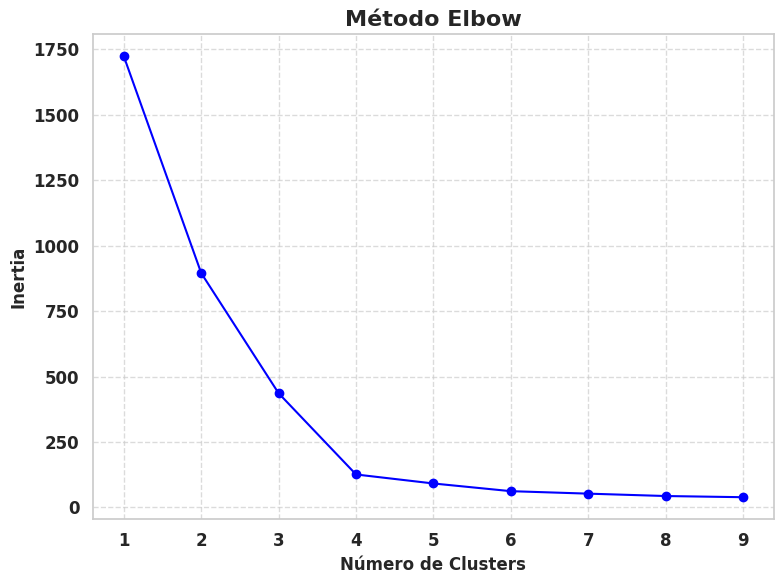

In [401]:
# Método Elbow

plt.figure(figsize=(8, 6))  # criando figura e definindo tamanho da figura
plt.plot(range(1, 10), inertia_scores, marker='o', color='blue', linestyle='-')  # passando dados e alguns estilos
plt.title('Método Elbow', fontsize=16, fontweight='bold')  # definindo título
plt.xlabel('Número de Clusters', fontsize=12, fontweight='bold')  # ajustando eixo X
plt.ylabel('Inertia', fontsize=12, fontweight='bold')  # ajustando eixo Y
plt.xticks(fontsize=12, fontweight= 'bold') # ajustando o tamanho da fonte dos ticks do eixo x
plt.yticks(fontsize=12, fontweight= 'bold') # ajustando o tamanho da fonte dos ticks do eixo y
plt.grid(True, linestyle='--', alpha=0.7)  # adicionando uma grade pontilhada com transparência
plt.tight_layout() # ajustando layout para evitar sobreposição de elementos
plt.show() # plotando a figura

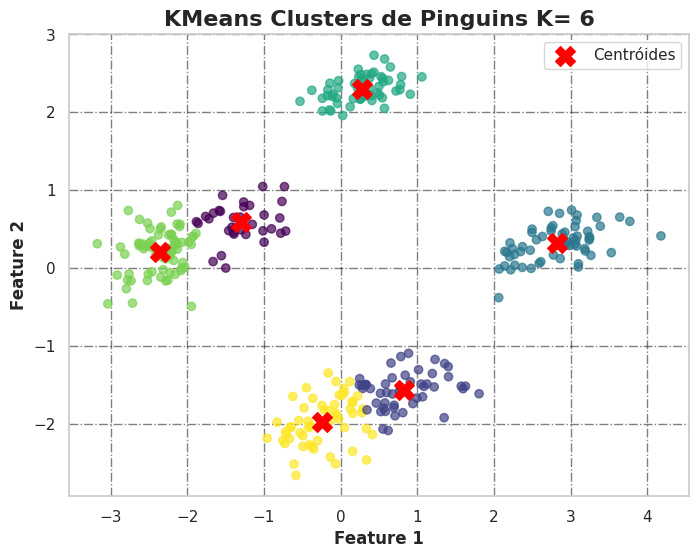

In [402]:
# Testando com 6 clusters

modelo_final_six = KMeans(n_clusters= 6, random_state= 0, n_init= 10)
rotulos = modelo_final_six.fit_predict(pinguins_reduzido)

# Plotando os clusters

plt.figure(figsize=(8, 6))
plt.scatter(pinguins_reduzido[:, 0], pinguins_reduzido[:, 1], c=rotulos, cmap='viridis', marker='o', alpha=0.7) # scatterplot dos dados de acordo com os rótulos dos clusters
plt.scatter(modelo_final_six.cluster_centers_[:, 0], modelo_final_six.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centróides') # plotando os centróides dos clusters
plt.title('KMeans Clusters de Pinguins K= 6', fontsize= 16, fontweight= 'bold') # defindo título
plt.xlabel('Feature 1', fontsize= 12, fontweight= 'bold') # eixo X
plt.ylabel('Feature 2', fontsize= 12, fontweight= 'bold') # eixo Y
plt.legend() # mostrando a legenda
plt.grid(True, linestyle= 'dashdot', color= 'black', alpha= 0.5) # mostrando e defindo estilos das linhas
plt.show() # plotando a figura

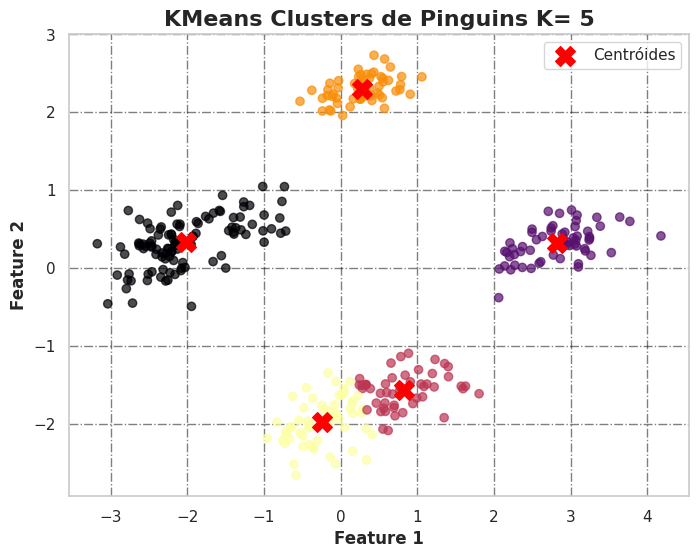

In [403]:
# Testando com 5 clusters

modelo_final_five = KMeans(n_clusters= 5, random_state= 0, n_init= 10)
rotulos = modelo_final_five.fit_predict(pinguins_reduzido)

# Plotando os clusters

plt.figure(figsize=(8, 6))
plt.scatter(pinguins_reduzido[:, 0], pinguins_reduzido[:, 1], c=rotulos, cmap='inferno', marker='o', alpha=0.7) # scatterplot dos dados de acordo com os rótulos dos clusters
plt.scatter(modelo_final_five.cluster_centers_[:, 0], modelo_final_five.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centróides') # plotando os centróides dos clusters
plt.title('KMeans Clusters de Pinguins K= 5', fontsize= 16, fontweight= 'bold') # defindo título
plt.xlabel('Feature 1', fontsize= 12, fontweight= 'bold') # eixo X
plt.ylabel('Feature 2', fontsize= 12, fontweight= 'bold') # eixo Y
plt.legend() # mostrando a legenda
plt.grid(True, linestyle= 'dashdot', color= 'black', alpha= 0.5) # mostrando e defindo estilos das linhas
plt.show() # plotando a figura

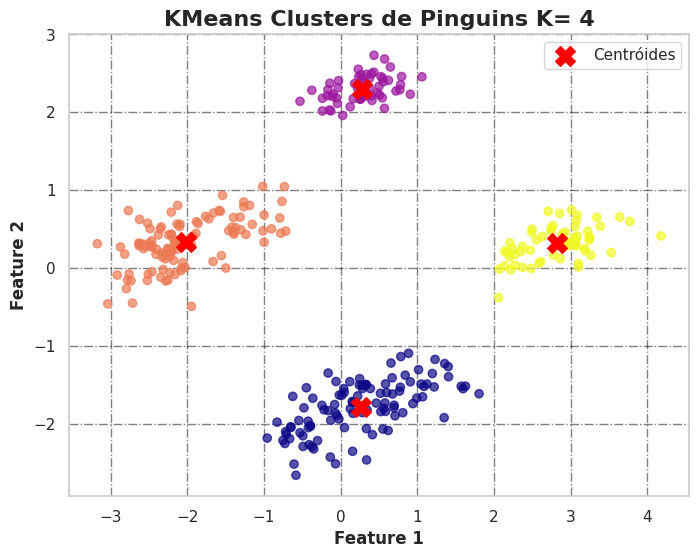

In [404]:
# Testando com 4 clusters

modelo_final_four = KMeans(n_clusters= 4, random_state= 0, n_init= 10)
rotulos = modelo_final_four.fit_predict(pinguins_reduzido)

# Plotando os clusters

plt.figure(figsize=(8, 6))
plt.scatter(pinguins_reduzido[:, 0], pinguins_reduzido[:, 1], c=rotulos, cmap='plasma', marker='o', alpha=0.7) # scatterplot dos dados de acordo com os rótulos dos clusters
plt.scatter(modelo_final_four.cluster_centers_[:, 0], modelo_final_four.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centróides') # plotando os centróides dos clusters
plt.title('KMeans Clusters de Pinguins K= 4', fontsize= 16, fontweight= 'bold') # defindo título
plt.xlabel('Feature 1', fontsize= 12, fontweight= 'bold') # eixo X
plt.ylabel('Feature 2', fontsize= 12, fontweight= 'bold') # eixo Y
plt.legend() # mostrando a legenda
plt.grid(True, linestyle= 'dashdot', color= 'black', alpha= 0.5) # mostrando e defindo estilos das linhas
plt.show() # plotando a figura